In [1]:
#!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,silhouette_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
import missingno as mno
from sklearn import tree,preprocessing 
#import graphviz 

In [3]:
def evaluate(p_target_test, p_pred):
    precision = precision_score(p_target_test, p_pred)
    recall = recall_score(p_target_test, p_pred)
    f1 = f1_score(p_target_test, p_pred)
    
    print("Confusion Matrix:\n", confusion_matrix(p_target_test, p_pred))
    cm = pd.crosstab(p_target_test, p_pred)
    sns.heatmap(cm, annot=True)
    print("Accuracy Score:", accuracy_score(p_target_test, p_pred))
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [4]:
dfd = pd.read_csv("diabetes.csv")

In [5]:
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploration des données

#### Les caractéristiques principales de ce data set sont

-Pregnancies = grossesses,
-Glucose = Glucose (teste**)
-BloodPressure = pression artériel (mm Hg)
-SkinThickness = épaisseur de la peau en mm
-Insulin = Insuline, Serum insuline pour 2 heures 
-BMI = indice de masse corporel, (Poids en kg/hauteur en m)^2
-DiabetesPedigreeFunction = Diabetes généalogique résultat calculé selon antécédent familiaux
-Age = Age 
-Outcome = résultat

In [6]:
#Pregnancies = grossesse, BloodPressure = pression artériel, SkinThickness = épaisseur de la peau
#BMI = indice de masse corporel, DiabetesPedigreeFunction = Diabetes généalogique
#Outcome = résultat

In [7]:
dfd.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dfd.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#sns.pairplot(dfd, corner = True)

In [11]:
dfd['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [12]:
dfd=dfd[dfd["Age"]>=21]
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
dfdgraph = dfd.copy()

In [14]:
dfdgraph.Outcome.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

sns.countplot(dfdgraph["Outcome"],hue=dfdgraph.Outcome.value_counts(), palette="husl")


total  768    Diabètiques  268  Non diabètiques :  500


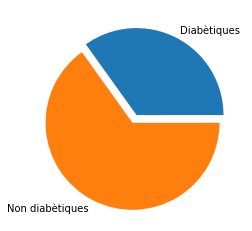

In [15]:
total = dfdgraph.shape[0]
truediab = dfdgraph.Outcome.sum()
falsediab = total - truediab
plt.pie([truediab/total, falsediab/total], labels=["Diabètiques", "Non diabètiques"], explode = [0.0, 0.1] )
print ("total ", total, "  ", "Diabètiques ", truediab, " Non diabètiques : ", falsediab)

In [16]:
dfdgraph['inter_age'] = pd.cut(dfdgraph['Age'], bins=[20,25,30,35,40,45,50,55,60,65,70,75])

In [17]:
dfdgraph

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,inter_age
0,6,148,72,35,0,33.6,0.627,50,1,"(45, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 35]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 35]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 25]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,"(60, 65]"
764,2,122,70,27,0,36.8,0.340,27,0,"(25, 30]"
765,5,121,72,23,112,26.2,0.245,30,0,"(25, 30]"
766,1,126,60,0,0,30.1,0.349,47,1,"(45, 50]"


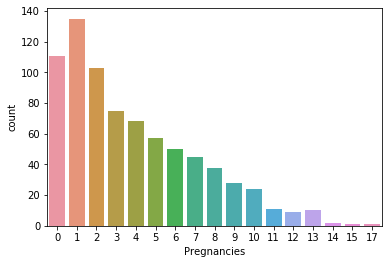

In [18]:
sns.countplot(x = "Pregnancies", data = dfdgraph)

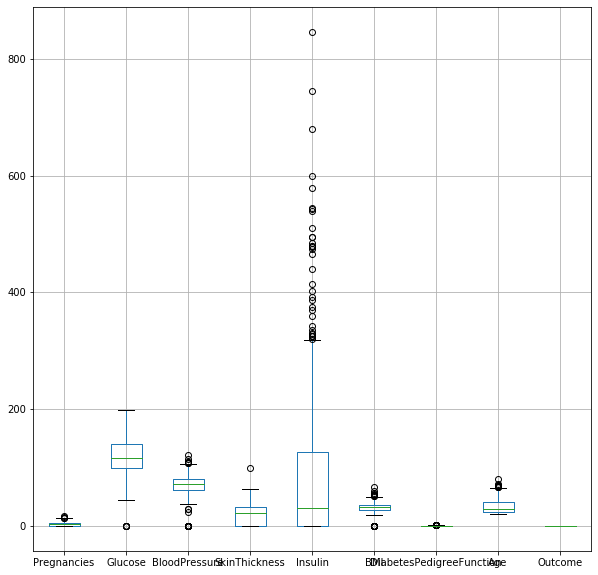

In [19]:
plt.figure(figsize=(10,10))
dfd.boxplot()

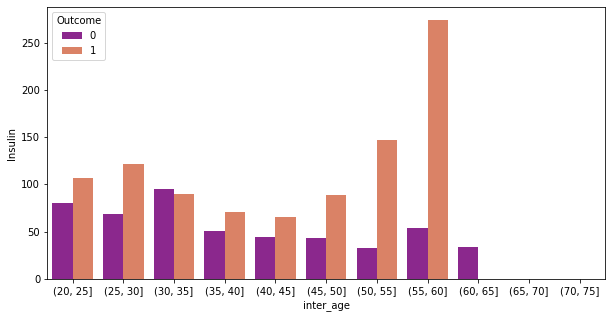

In [20]:
#taux_glucose et age 
plt.figure(figsize=(10,5))
sns.barplot(x ='inter_age',y='Insulin', hue ='Outcome',data=dfdgraph, ci = None, palette ="plasma")
plt.show()

Catégoriser La pression artérielle Le taux de Glucose

Permetttra de mieux comprendre les liens entre les différentes données création de plusieurs intervalles selon les seuils

normal BMI 18.5 to 24.9 Overweight 25 to 29.9 Obese >30


In [21]:
dfd[dfd['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


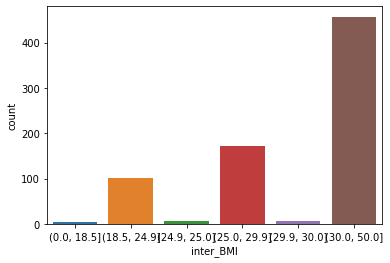

In [22]:
#
bins = [0,18.5,24.9,25,29.9,30,50]
dfdgraph['inter_BMI'] = pd.cut(dfdgraph['BMI'], bins)
sns.countplot(x = dfdgraph['inter_BMI']) 


# on repere une anomalie, avce les BMI à 0, 11

In [23]:
dfdgraph['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

In [24]:
dfdgraph['BMI'].max(), dfdgraph['BMI'].min()

(67.1, 0.0)

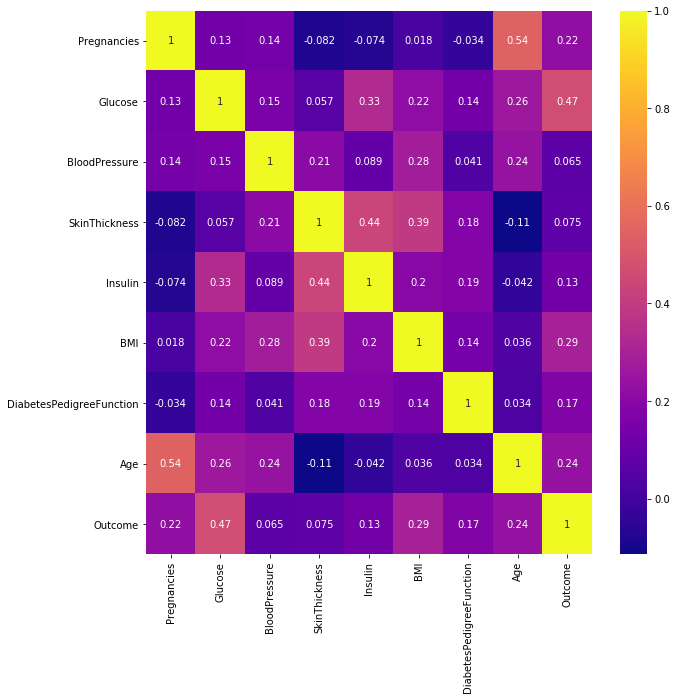

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(dfd.corr(),annot=True,cmap="plasma")
#Il n'y a pas de corrélation entre les données donc on peut garder toute les colonnes

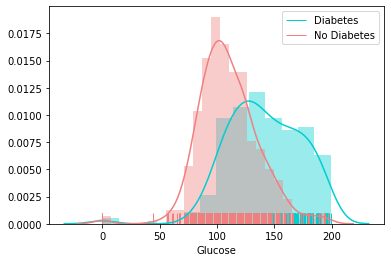

In [26]:
#
plt.figure()
ax = sns.distplot(dfd['Glucose'][dfd.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(dfd['Glucose'][dfd.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

In [27]:
X = dfd.drop('Outcome',axis=1)
y = dfd['Outcome']

In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
###Separation 

In [30]:
# separation
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
regr = LogisticRegression()
regr.fit(Xtr, ytr)
pred = regr.predict(Xte)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
print("Mean squared error : %0.2f" % r2_score(yte, pred)) 

Mean squared error : 0.17


In [33]:
print(classification_report(yte,pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [34]:
confusion_matrix(yte,pred)

array([[98,  9],
       [18, 29]], dtype=int64)

Confusion Matrix:
 [[98  9]
 [18 29]]
Accuracy Score: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


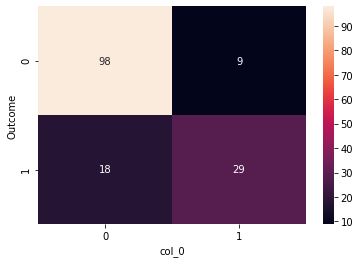

In [35]:
evaluate(yte, pred)

In [36]:
yte.value_counts()

0    107
1     47
Name: Outcome, dtype: int64

In [37]:
bin_count=np.bincount(pred)
bin_count

array([116,  38], dtype=int64)

In [38]:
dftoska=dfd.describe()
dftoska

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
dfd.columns[0:]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
i=1
e=1

In [41]:
for i in dfd.columns[1:7]:
    a=dfd.columns[e]
    dfd.loc[dfd[a] == 0.0, a] = np.NAN
    e=e+1

In [42]:
#dfd.loc[dfd["Glucose"] == 0.0, "Glucose"] = np.NAN
#dfd.loc[dfd["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
#dfd.loc[dfd["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
#dfd.loc[dfd["Insulin"] == 0.0, "Insulin"] = np.NAN
#dfd.loc[dfd["BMI"] == 0.0, "BMI"] = np.NAN

In [43]:
dfd.isnull().sum()[1:7]

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64

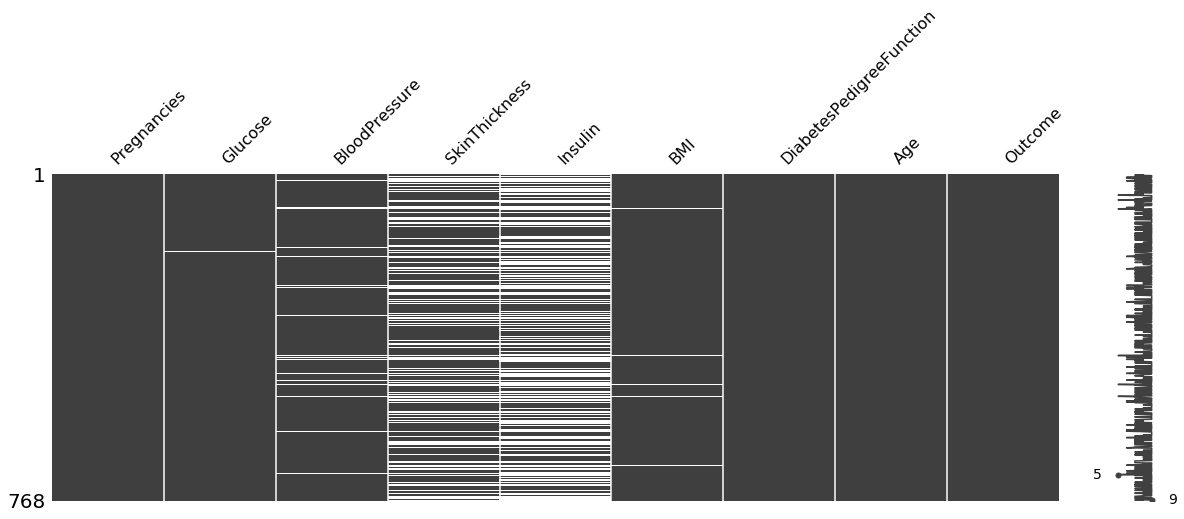

In [44]:
mno.matrix(dfd, figsize = (20, 6))

In [45]:
dfd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


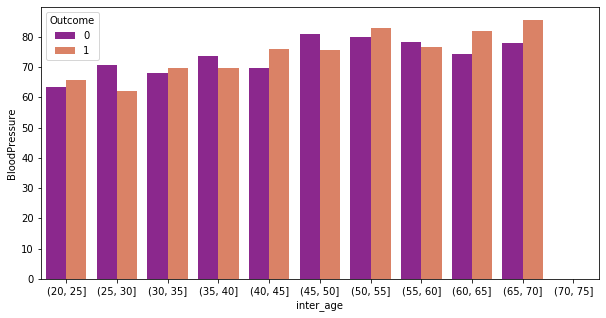

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(hue = "Outcome", x = dfdgraph["inter_age"], y = "BloodPressure", data=dfdgraph, ci = None, palette = "plasma")

In [47]:
dfd2=dfd.copy()

In [48]:
dfd2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [49]:
#dfclean = dfd2[dfd2['Insulin'].notnull()]
#dfd2['Insulin'].fillna(dfd2.Insulin.mean(), inplace = True)
dfclean=dfd2.copy()

In [50]:
#i=1
#e=0
#for i in dfclean.columns[:]:
#    a=dfclean.columns[e]
#    dfclean[a].fillna(dfclean[a].median(), inplace= True)
#    e=e+1
dfclean['Glucose'].fillna(dfclean['Glucose'].mean(), inplace = True)
dfclean['BloodPressure'].fillna(dfclean['BloodPressure'].mean(), inplace = True)
dfclean['SkinThickness'].fillna(dfclean['SkinThickness'].median(), inplace = True)
dfclean['Insulin'].fillna(dfclean['Insulin'].median(), inplace = True)
dfclean['BMI'].fillna(dfclean['BMI'].median(), inplace = True)

In [51]:
dfclean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [52]:
dfclean.isnull().sum()[1:7]

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
dtype: int64

In [53]:
#df['Glucose'].fillna(df.Glucose.mean(), inplace = True)
#df['BMI'].fillna(df.BMI.mean(), inplace = True)

In [54]:
#dfclean['Glucose'].fillna(dfclean.Glucose.median(), inplace = True)
#dfclean['BMI'].fillna(dfclean.BMI.median(), inplace = True)
#dfclean['BloodPressure'].fillna(dfclean.BloodPressure.median(), inplace = True)
#dfclean['SkinThickness'].fillna(dfclean.SkinThickness.median(), inplace = True)

In [55]:
dfclean.isnull().sum()[0:]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
#missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [57]:


#def random_imputation(df, feature):

#    number_missing = df[feature].isnull().sum()
#    observed_values = df.loc[df[feature].notnull(), feature]
#    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
#    return df



In [58]:
#for feature in missing_columns:
#    df[feature + '_imp'] = df[feature]
#    df = random_imputation(df, feature)


In [59]:
dfdy = dfclean[dfclean['Outcome']==1]

In [60]:
dfdy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
757,0,123.0,72.0,29.0,125.0,36.3,0.258,52,1
759,6,190.0,92.0,29.0,125.0,35.5,0.278,66,1
761,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1


In [61]:
#On a donc 268 patient atteint de diabètes

In [62]:
dfdy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164,1.0
std,3.741239,29.541750,11.945712,8.662994,100.932249,6.595603,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,29.000000,125.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,29.000000,125.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [63]:
dfdn = dfclean[dfclean['Outcome']==0]
dfdn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
10,4,110.0,92.000000,29.0,125.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.000000,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.000000,23.0,112.0,26.2,0.245,30,0


In [64]:
moyPyes = dfdn['Pregnancies'].values.mean()
moyPyes
moyGyes = dfdn['Glucose'].values.mean()
moyGyes
moyByes = dfdn['BloodPressure'].values.mean()
moyByes
moySyes = dfdn['SkinThickness'].values.mean()
moySyes
moyIyes = dfdn['Insulin'].values.mean()
moyIyes
moyBMyes = dfdn['BMI'].values.mean()
moyBMyes
moyDyes = dfdn['DiabetesPedigreeFunction'].values.mean()
moyDyes
moyAyes = dfdn['Age'].values.mean()
moyAyes

31.19

In [65]:
moyPn = dfdy['Pregnancies'].values.mean()
moyPn
moyGn = dfdy['Glucose'].values.mean()
moyGn
moyBn = dfdy['BloodPressure'].values.mean()
moyBn
moySn = dfdy['SkinThickness'].values.mean()
moySn
moyIn = dfdy['Insulin'].values.mean()
moyIn
moyBMn = dfdy['BMI'].values.mean()
moyBMn
moyDn = dfdy['DiabetesPedigreeFunction'].values.mean()
moyDn
moyAn = dfdy['Age'].values.mean()
moyAn

37.06716417910448

In [66]:
dfcomp=pd.DataFrame(columns=['Pregnancies'])
dfcomp

,Pregnancies


In [67]:
dfcomp["Pregnancies"] = (moyPn,moyPyes)
dfcomp["Glucose"] = (moyGn,moyGyes)
dfcomp["BloodPressure"] = (moyBn,moyByes)
dfcomp["SkinThickness"] = (moySn,moySyes)
dfcomp["Insulin"] = (moyIn,moyIyes)
dfcomp["BMI"] = (moyBMn,moyBMyes)
dfcomp["DiabetesPedigreeFunction"] = (moyDn,moyDyes)
dfcomp["Age"] = (moyAn,moyAyes)
dfcomp["Outcome"] = (1,0)
dfcomp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164,1
1,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000,0


In [68]:
dfpiv=(dfcomp.pivot_table(columns='Outcome'))
dfpiv
#On peut voir que les diabètiques on en moyenne des scores plus élévé partout

Outcome,0,1
Age,31.190000,37.067164
BMI,30.885600,35.383582
BloodPressure,70.935397,75.147324
DiabetesPedigreeFunction,0.429734,0.550500
Glucose,110.710121,142.165573
Insulin,127.792000,164.701493
Pregnancies,3.298000,4.865672
SkinThickness,27.726000,31.686567


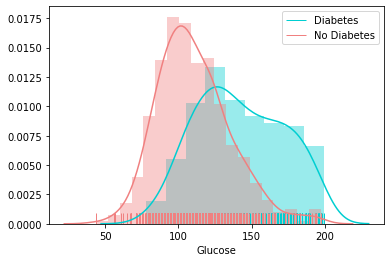

In [69]:
df=dfclean.copy()
# apres nettoyage
plt.figure()
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

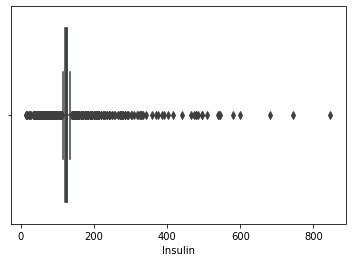

In [70]:
# apres
sns.boxplot(x = df['Insulin'])

In [71]:
dfd2=dfd[dfd['Insulin'].lt(16)]
dfd2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
617,2,68.0,62.0,13.0,15.0,20.1,0.257,23,0


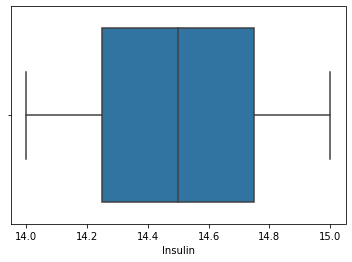

In [72]:
# insuline > 16
sns.boxplot(x = dfd2['Insulin'])

In [73]:
df=dfclean[dfclean["Age"]>=21]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [74]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [77]:
score_regr= model.score(X_test, y_test)
print(score_regr)

0.7857142857142857


Confusion Matrix:
 [[90  7]
 [26 31]]
Accuracy Score: 0.7857142857142857
Precision: 0.8157894736842105
Recall: 0.543859649122807
F1 Score: 0.6526315789473685


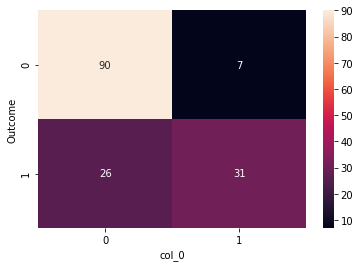

In [78]:
evaluate(y_test, y_pred)

In [79]:
confusion_matrix(y_test,y_pred)

array([[90,  7],
       [26, 31]], dtype=int64)

In [80]:
y_test

353    0
236    1
323    1
98     0
701    1
      ..
153    0
392    0
308    1
70     1
513    0
Name: Outcome, Length: 154, dtype: int64

In [81]:
#On peut voir comme l'a dit l'étude scientifique que les prédictions sont beaucoup plus précise lorsque l'on
#enleve les insulines à 0
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        97
           1       0.82      0.54      0.65        57

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.79      0.79      0.77       154



In [82]:
#regressor = xgb.XGBRegressor(
   # n_estimators=100,
   # reg_lambda=1,
   # gamma=0,
   # max_depth=3
#)

In [83]:
#regressor.fit(X_train, y_train)

In [84]:
#score = regressor.score(X_train, y_train)  

#print("Training score: ", score)

In [85]:
#predgb = regressor.predict(X_test)

In [86]:
#x_ax = range(len(y_test))
#plt.plot(x_ax, y_test, label="original")
#plt.plot(x_ax, predgb, label="predicted")

#plt.title("diabetes test and predicted data")

#plt.legend()
#plt.show()

In [87]:
classi = xgb.XGBClassifier()

In [88]:
train_class = classi.fit(X_train, y_train)

In [89]:
predgbcla = train_class.predict(X_test)

In [90]:
from sklearn import metrics
print('precision',metrics.accuracy_score(y_test,predgbcla))

precision 0.7337662337662337


In [91]:
score_XGb = train_class.score(X_test,y_test)
score_XGb

0.7337662337662337

In [92]:
print(classification_report(y_test,predgbcla))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        97
           1       0.67      0.56      0.61        57

    accuracy                           0.73       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [93]:
feature_imp = pd.Series(classi.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Glucose                     0.218309
BMI                         0.157479
Insulin                     0.135183
Age                         0.116945
SkinThickness               0.103020
DiabetesPedigreeFunction    0.100751
Pregnancies                 0.087510
BloodPressure               0.080803
dtype: float32

No handles with labels found to put in legend.


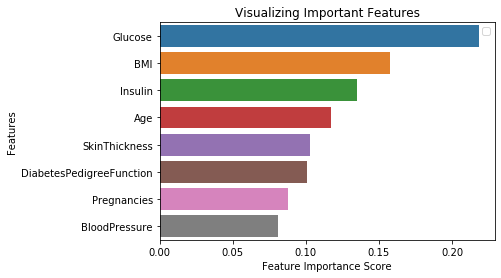

In [94]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


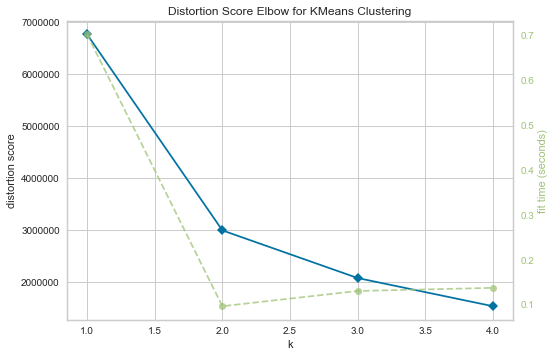

In [95]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model_Kmean = KMeans()
visualizer = KElbowVisualizer(model_Kmean, k=(1,5))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [96]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.7249817589917965
For n_clusters=3, The Silhouette Coefficient is 0.5202728349171528
For n_clusters=4, The Silhouette Coefficient is 0.3920661393502421
For n_clusters=5, The Silhouette Coefficient is 0.344752902060855
For n_clusters=6, The Silhouette Coefficient is 0.35318550447309655
For n_clusters=7, The Silhouette Coefficient is 0.3548382722106083
For n_clusters=8, The Silhouette Coefficient is 0.2731406223603212
For n_clusters=9, The Silhouette Coefficient is 0.28099377283025256
For n_clusters=10, The Silhouette Coefficient is 0.2625357563432823


In [97]:
est = KMeans(n_clusters=2, n_init=10,init='k-means++')
est.fit(X_train)
pred = est.predict(X_test)
K_pred = pd.DataFrame(pred, columns=['Outcome'])
K_pred

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
149,1
150,1
151,0
152,0


In [126]:
score = accuracy_score(y_test,est.predict(X_test))
print('Accuracy:{0:f}'.format(score))


Accuracy:0.649351


In [101]:
#K_pred.iloc[:,0].value_counts()
K_pred["Outcome"].value_counts()

0    135
1     19
Name: Outcome, dtype: int64

In [102]:
y_test.value_counts()

0    97
1    57
Name: Outcome, dtype: int64

In [ ]:
y.value_counts()

In [103]:
#Create a Gaussian Classifier
rdf_eq=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rdf_eq.fit(X_train,y_train)

# prediction on test set
y_predeq=rdf_eq.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predeq))


Accuracy: 0.8116883116883117


In [104]:
print(classification_report(y_test,y_predeq))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.79      0.67      0.72        57

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



In [106]:
score_rfc= rdf_eq.score(X_test, y_test)
print(score_rfc)

0.8116883116883117


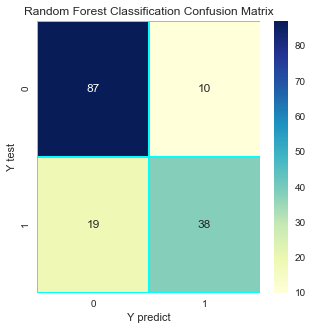

In [107]:
# The confusion matrix
rfcla_cm = confusion_matrix(y_test, y_predeq)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [105]:
#Précision moins précise avec nos données équilibrés
regressor = RandomForestRegressor(n_estimators = 10, random_state= 0)
regressor.fit(X_train, y_train)

ypredfor= regressor.predict(X_test)
ypredfor

array([0. , 1. , 0.6, 0.2, 0.7, 0.4, 0. , 0.3, 0.8, 0.2, 0.9, 0.1, 0.6,
       0.9, 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.3, 0.2, 0.7, 0.7, 0.3, 0. ,
       0.1, 0.6, 0.5, 0. , 0.6, 0. , 0.3, 0.7, 0. , 0.7, 0.8, 0.2, 0.8,
       0.3, 0.7, 0.6, 1. , 0. , 0.2, 0.1, 0.7, 0.6, 0.5, 0.7, 0. , 0. ,
       0.4, 0.5, 0.6, 0.5, 0.2, 0. , 0.5, 0.2, 0.1, 0.4, 0. , 0.6, 0.9,
       0.4, 0. , 0.8, 1. , 0.7, 0.8, 0.8, 0.4, 0. , 0.3, 0.5, 0.3, 0. ,
       0.1, 0. , 0.1, 0.2, 0.2, 0.1, 0.4, 0.7, 0.8, 0.1, 0.6, 0. , 0.5,
       0.2, 0.7, 0.2, 0.2, 0.9, 0.5, 0. , 0.6, 0.3, 0.3, 0.3, 0.1, 0.1,
       0.2, 0. , 0.1, 0.2, 0.1, 0.8, 0. , 0.7, 0.8, 0. , 0.8, 0.6, 0.1,
       0.2, 0.6, 0.9, 0.4, 0. , 0.1, 0. , 0.2, 0.9, 0. , 0.4, 0. , 0. ,
       0.1, 0.9, 0. , 0.1, 0.3, 0. , 0. , 0.2, 0. , 0.9, 0. , 0.6, 0.6,
       0.7, 0.1, 0.6, 0.5, 0. , 0.6, 0.2, 0.1, 0.3, 0. , 0. ])

In [108]:
r2_score(y_test, ypredfor)

0.3515789473684211

In [ ]:
#def scor (model):
#    model=RandomForestClassifier(n_estimators=100)
#    model.fit(X_train,y_train)
#    y_predeq=rdf_eq.predict(X_test)

In [120]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [123]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  7],
       [32, 25]], dtype=int64)

In [124]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.7467532467532467


array([[90,  7],
       [32, 25]], dtype=int64)

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=2)
dtr=dtree.fit(X_train, y_train)
dtrpred = dtree.predict(X_test)
print(classification_report(y_test,dtrpred))

In [ ]:
score_dtr = dtree.score(X_test, y_test)
print(score_dtr)

In [ ]:
# The confusion matrix
dtcla_cm = confusion_matrix(y_test, dtrpred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
#df['Outcome']= df.Outcome.apply(lambda x:
#                      " non Diabètique" if x == 0
#                       else "Diabètique")

In [ ]:
#y.values('1') = "Diabètiques"
#y.values('0') = "Non Diabètiques"
y[y == 1] = "Diabètique"
y[y == 0] = "Non Diabètique"

In [ ]:
y.values

In [ ]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtr, filled=True, rounded = True,proportion=True,feature_names= X.columns,class_names=y.values)
plt.show()

In [ ]:


plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')



In [ ]:

X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

In [ ]:
X_scaled 

In [ ]:
a = sns.boxplot(data = X_scaled)

In [ ]:
# paramétrage pour faire plusieurs graphiques
#2 = rows pour lignes = 2 lignes l,c = ligne et colonne
#sharex = axe des abscisses partagé

fig,axes = plt.subplots(2, figsize = (40,30),sharex= True) 

sns.set() #Pour le focus du graphique, le zoom , coefficient avec les autres mesures
plt.title('Distribution du jeu de données',color = 'white', size = 65)
plt.xlabel('Caractéristiques',color = 'white' ,size = 35)


h = sns.boxplot( ax = axes[0],data = dfclean[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]) 
#h.set_yticklabels(h.get_yticks(), size=15)
axes[0].set_title('Distribution avant normalisation', size = 65)

a = sns.boxplot(ax = axes[1],data = X_scaled)
axes[1].set_title('Distribution après normalisation', size = 65)


In [ ]:
from sklearn.decomposition import *
from sklearn.preprocessing import *
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
diabetes = df[["Pregnancies","Glucose","BloodPressure", "SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction","Age"]]
# réduction d'échelle
data = pd.DataFrame(scale(diabetes),columns=diabetes.columns)
# composantes principales
C = pca.fit(data).transform(data)
C

In [ ]:
print("On peut voir ici que les premières variables générées concentrent le plus grand poids de données")
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
print("Taux (addition) de valeurs contenues dans les variables PCA 0 et 1:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]))

print("Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]))

In [ ]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
for i, j, word in zip(C[:,0], C[:,1], df['Outcome']):
    color = "red" if word == "Diabètique" else "blue"
    plt.text(i, j, word, color=color)
plt.axis((-6,7.5,-5,6))  
plt.show()

In [ ]:
df_acp = df.copy()
df_acp["pca0"], df_acp["pca1"], df_acp["pca2"] = C[:,0], C[:,1], C[:,2]
df_acp.head()

In [ ]:
import plotly.express as px

px.scatter_3d(df_acp, "pca0", "pca1", "pca2", color="Outcome")

In [ ]:
df.to_csv('diabetes_clean.csv', index=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(estimator = SVC(kernel = 'rbf'), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

In [ ]:
cm_random_forest_classifier = confusion_matrix(y_test,y_pred_rfc)
print(cm_random_forest_classifier,end="\n\n")

In [ ]:
from sklearn.svm import SVC
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')


In [ ]:
score_svc= support_vector_classifier.score(X_test, y_test)
print(score_svc)

In [ ]:
print(classification_report(y_test,y_pred_svc))

In [ ]:
cm_sup_v = confusion_matrix(y_test, y_pred_svc)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_sup_v, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [ ]:
numerator = cm_random_forest_classifier[0][0] 
+ cm_random_forest_classifier[1][1]
denominator = sum(cm_random_forest_classifier[0]) + sum(cm_random_forest_classifier[1])
acc_rfc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_rfc,2),"%")

In [ ]:
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_rfc.mean() * 100 , 2),"%")


In [ ]:
cross_val_rfc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

In [ ]:
score_knncla= knncla.score(X_test, y_test)
print(score_knncla)

In [ ]:
print(classification_report(y_test,Y_predict6))

In [ ]:


# The confusion matrix
knncla_cm = confusion_matrix(y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()



In [ ]:
Testscores = pd.Series([score_regr, score_svc, score_dtr, score_rfc, score_knncla, score_XGb], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score', 'XGboost Score']) 
print(Testscores)